<a href="https://colab.research.google.com/github/fbeilstein/topological_data_analysis/blob/master/lecture_6_persistence_homology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title #Different TDA Usage Examples

%%html
<link   rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
`
<div style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="8">
Topological features and NNs
</font>
<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/topological_features_cnn.png" width="800px" style="float: right; margin: 7px 0 7px 7px;">
</div>
`,`
<div style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="8">
Topological analysis of proteins
</font>
<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/barcode_diagrams_on_proteins.png" width="800px" style="float: right; margin: 7px 0 7px 7px;">
</div>
`,`
<div style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="8">
Persistent Homology to Detect DNA-Recombination
</font>
<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/finches_recombination_tda.png" width="800px" style="float: right; margin: 7px 0 7px 7px;">
<br><br>
<a href="https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005071">
From Pablo G. Cámara, Arnold J. Levine, and Raúl Rabadán, 'Inference of ancestral
recombination graphs through topological data analysis',
PLOS Computational Biology 12.8 (2016). doi: 10.1371/journal.pcbi.1005071
</a>
</div>
`,`
<div style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="8">
Topological analysis of proteins
</font>
<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/secondary_structure_to_barcode.png" width="800px" style="float: right; margin: 7px 0 7px 7px;">
</div>
`,`
<div style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="8">
Persistent Homology and Machine Learning
</font>
<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/tda_and_ml_diagram.png" width="800px" style="float: right; margin: 7px 0 7px 7px;">
</div>
`,`
<div style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="8">
Dimensionality Reduction for Transcriptomics
</font>
<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/transcriptomics_dimensionality_reduction.png" width="800px" style="float: right; margin: 7px 0 7px 7px;">
</div>
`,`
<div style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="8">
Time Series Analysis
</font>
<img src="https://lewtun.github.io/hepml/images/sliding_window_embedding.png" width="800px" style="float: right; margin: 7px 0 7px 7px;">
</div>
`
  ]
)
</script>

* A number of computational problems in theoretical physics can be reduced to comparing points or clouds of points, be these points measured or calculated positions of real physical objects (e.g. stars, galaxies, gas molecules) or even states of a certain system in its configuration space.
* We are considering the problem of comparing two pointclouds.
* There is no general straightforward method to do that: considering each individual point leads to “informational overflow,” ambiguity, and in most cases will be too sensitive to small changes in the positions of points.
* Consider comparing gas in two baloons. What if you have no thermodynamics?


**Here comes Topology**

* To solve the problem, one can avoid considering individual points, but
extract instead certain generalized information about their distribution that will comprise a manageable amount of numbers and then look for some notion of distance for these sets of numbers.
* $$
\begin{array}{llllllll}
\text{Point Cloud 1} & \rightarrow &\text{Topological Magic} &\rightarrow &\text{Numbers} & \searrow \\
 & & & & & \text{Comparison Procedure} & \rightarrow & \text{Result} \\
\text{Point Cloud 2} & \rightarrow &\text{Topological Magic} &\rightarrow &\text{Numbers} & \nearrow \\
\end{array}
$$


**Topological Magic be like**

$$\require{AMScd}
\begin{CD}
\text{Point Cloud} @>>> \text{Manifold} @>\text{topology}>> \text{Complex (Simplicial, $\Delta$-, CW-)} @>\text{algebra}>> \text{Homology groups} @>>> \text{Betti Numbers}\\
\end{CD}$$

### Simplicial Complex: a Bridge between Topology and Algebra

The first step in the analysis provided is the construction of a special mathematical object--- a simplicial complex--- from the dataset given.
A simplicial complex is so special because it bridges topology and algebra.
Let's first define a simplex as a geometrical object.

**Example of geometric simplices:**

![img](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/Simplexes.jpg/640px-Simplexes.jpg)


**Definition.**
A set of points $\{a_0,\dots,a_n\}$ in some Euclidean space $\mathbb{R}^m$ is said to be **independent** if vectors $a_1 - a_0$, $a_2 - a_0$,...,$a_n - a_0$ are linearly independent.


**Theorem.**
Any subset of a linearly independent set of points is linearly independent.

$\blacktriangleleft$ Obvious if $a_0$ is in the subset.
If not take any $a_k$ and consider vectors $a_i - a_k$ together with $a_k - a_0$.
This set is linearly independent due to $(a_i - a_k) + (a_k - a_0) = a_i - a_0$, thus a set of $a_i - a_k$ only is linearly independent as well. $\blacksquare$


**Definition.**
A **geometric $n$-simplex** $\sigma^n$ is a set of points
$$
\sigma^n = \left\{\left.
\sum_{i=0}^n \lambda_i a_i\right|
\lambda_i \geq 0,\quad \sum_{i=0}^n \lambda_i = 1
\right\}
$$
where $a_i$ are independent points in some Euclidean space $\mathbb{R}^m$; $\sigma^n$ is given the subspace topology.
The subspace of $\sigma^n$ of the points with  $\lambda_{k_0}=0,\dots,\lambda_{k_p}=0$ for a set of indices $\{k_0,\dots,k_p\}$ is called a **face of $\sigma^n$**.
The face is **proper** if it's not empty or the whole $\sigma^n$.


**Definition.**
A **geometric simplicial complex $K$** is a finite set of simplices all contained in $\mathbb{R}^m$ and satisfying:
* if $\sigma^n$ is a simplex of $K$ and $\tau^p$ is a face of $\sigma^n$, then $\tau^p$ is in $K$;
* if $\sigma^n$ and $\tau^p$ are simplices in $K$, then $\sigma^n \cap \tau^p$ is either empty or a common face of $\sigma^n$ and $\tau^p$.

The **dimension** of $K$ is the maximal dimension of its simplices.


**Definition.**
A union of all geometric simplices of a geometric simplicial complex $K$ equipped with a subset topology (with respect to $\mathbb{R}^m$) is called a **polyhedron $|K|$**.



In [ ]:
#@title #Simplicial Complex

%%html
<link   rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_slides_from(
[
`
<div style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="6">
Simplicial Complex
</font>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Simplicial_complex_example.svg/494px-Simplicial_complex_example.svg.png"
width="350px" style="float: left; margin: 7px 0 7px 7px;">
</div>
`,`
<div style="max-width:750px; height:200px;">
<font face="helvetica" color="black" size="6">
Invalid Complex
</font>
<img src="https://raw.githubusercontent.com/fbeilstein/presentations/master/images/invalid_simplicial_complex.png"
width="350px" style="float: left; margin: 7px 0 7px 7px;">
</div>
`
]
)
</script>

**Sidenote:**  
Loosely speaking Simplicial complexes, $\Delta$-complexes, and CW-complexes are all constructed by gluing together simplices. However, for each one, there are different rules for what kinds of "gluings" you are allowed to use.
* For CW-complexes, you are allowed to use almost any gluing. Specifically, a CW-complex is constructed by induction, where at each step, you adjoin a new simplex by gluing its boundary to the complex you have already by any map. The only restriction to this gluing process is that you have to add simplices in increasing order of dimension.
* $\Delta$-complex is a union of simplices which are glued together by just gluing their faces together in the "obvious" linear way, rather than by arbitrary complicated continuous maps. Note, however, that some faces of a single simplex might get glued to each other: you can start with a single vertex and then add an edge both of whose boundary vertices are the one vertex you started with (this gives you a circle).
* Simplicial complexes are $\Delta$-complexes which satisfy even more restrictions: it is required to map different faces of $\partial \Delta n$  to different ($n-1$)-simplices, so the situation discussed at the end of the previous paragraph cannot happen. In addition, you are not allowed to add two different $n$-simplices with the same set of vertices.

It is often more simple to use CW- or $\Delta$ complexes for theoretical calculations, but simplicial complexes for computer-aided calculations. Guuess, what we prefer :)


But what if we consider a simplicial complex as a purely combinatorial object that only defines relations between its vertices without referring to geometry?

**Definition 1.**
An **abstract simplicial complex $\mathcal{K}$** is a finite set of elements $a_0,\dots,a_N$ called **(abstract) vertices**, together with a collection of subsets of the form $(a_{i_0},\dots,a_{i_n})$ called **(abstract) simplices** closed under the operation of taking a subset (subset of a simplex is itself a simplex).
A simplex $(a_{i_0},\dots,a_{i_n})$ contains $n+1$ points, while $n$ is called the **dimension of the simplex**.
The **dimension of $\mathcal{K}$** is the maximum of the dimensions of its simplices.



**Definition.**
Let $K$ be a geometric simplicial complex and $\mathcal{K}$ be an abstract simplicial complex such that there exists a bijection between their vertices and a subset of vertices being simplex in $\mathcal{K}$ if and only if they correspond to the vertices of some simplex in $K$. $\mathcal{K}$ is called an **abstraction** of $K$ and $K$ is called a **realization** of $\mathcal{K}$.


Obviously, any geometric simplicial complex can be abstracted, but surprisingly we can always do the other way around with **Theorem 1**.
The realization is unique in some sense, thus abstract and geometrical simplices are firmly connected.


**Definition.**
Given geometric simplicial complexes $K$ and $L$, a **simplicial map** is a function $f: K \to L$ with the following properties:
* if $a$ is a vertex of $K$, then $f(a)$ is a vertex of $L$;
* if $a_0$,...,$a_n$ are vertices of a simplex $\sigma^n$ of $K$, then $f(a_0)$,...,$f(a_n)$ span a simplex in $L$ (note: repeats possible) and $f(\sum_{i=0}^n \lambda_i a_i) = \sum_{i=0}^n \lambda_i f(a_i)$ ("linear" on each simplex).



**Theorem 1.**
An $n$-dimensional abstract simplex $\mathcal{K}$ has a realization in $\mathbb{R}^{2n+1}$.
Moreover, let $K_1$ and $K_2$ be realisations of $\mathcal{K}$, then there exists a homeomorphism being a simplicial map $f : |K_1| \to |K_2|$.

$\blacktriangleleft$ see~\cite{maunder} $\blacksquare$


The key point is that the geometric information is retained within the abstraction of a geometric simplicial complex. If any information were lost during the abstraction, we should have been able to construct at least two non-homeomorphic realizations of $\mathcal{K}$ that fill in differently the missing piece of information. However, the **Theorem 1** forbids that, thus abstraction retains all the topological information. This connection paves the way for a transition between geometry and algebra.

###Refresher on Algebra


* **1. Set**
A collection of elements with no additional structure.

* **2. Magma**
A set $S$ with a binary operation $\circ : S \times S \to S$.

* **3. Semigroup**
A magma where the binary operation is **associative**:
$$
(a \circ b) \circ c = a \circ (b \circ c), \quad \forall a,b,c \in S.
$$

* **4. Monoid**
A semigroup with an **identity element** $e$:
$$
e \circ a = a \circ e = a, \quad \forall a \in S.
$$

* **5. Group**
A monoid where every element has an **inverse** $a^{-1}$ such that:
$$
a \circ a^{-1} = a^{-1} \circ a = e, \quad \forall a \in S.
$$

* **6. Abelian Group**
A group where the operation is also **commutative**:
$$
a \circ b = b \circ a, \quad \forall a, b \in S.
$$

* **7. Ring** (in some sources **Ring with Unity**)
A set $R$ with two operations: $(R, +)$ is an abelian group, $(R, \cdot)$ is a monoid, and multiplication distributes over addition:
$$
a \cdot (b + c) = a \cdot b + a \cdot c, \quad (b + c) \cdot a = b \cdot a + c \cdot a.
$$

* **8. Commutative Ring**
A ring where multiplication is commutative:
$$
a \cdot b = b \cdot a, \quad \forall a, b \in R.
$$


* **10. Integral Domain**
A commutative ring with unity where there are **no zero divisors**, meaning:
$$
a \cdot b = 0 \Rightarrow a = 0 \text{ or } b = 0.
$$

* **11. Field**
An integral domain where every nonzero element has a multiplicative inverse:
$$
a \cdot a^{-1} = 1, \quad \forall a \neq 0.
$$

* **12. Vector Space**
A set $V$ over a field $F$ with vector addition and scalar multiplication satisfying:
   - $(V, +)$ is an abelian group.
   - Scalar multiplication is associative and distributive.

* **13. Module**
A generalization of vector spaces where scalars come from a \textbf{ring} instead of a field.

* **14. Algebra**
A vector space (or module) equipped with a bilinear multiplication operation.



###Doing Algebra on Simplicial Complexes

Now we know how to create simplicial complexes from the data and we can study the topology of the appropriate polyhedrons.
Ironically, to study the topology of the simplicial complexes we need to transfer to algebra: the ultimate goal of this appendix--- the definition of Betti numbers--- is achieved in the realm of algebra.

**Definition 2.**
An **oriented simplex $\sigma^n$** is an abstract simplex (**Definition 1**) with orientation chosen.
That is all the vertices of $\sigma^n$ are arbitrarily ordered, say $[v_0,\dots,v_p]$, and this order is given sign $+$.
For any different ordering of the vertices, the sign is $+$ if it can be obtained from the chosen ordering by an even number of swaps of two vertices at a time, otherwise, it is $-$.
Obviously, an **oriented abstract simplicial complex $\mathcal{K}$** is constructed from oriented simplices.


**Definition 3.**
The **$p$-chain** of $\mathcal{K}$, $C_p(\mathcal{K})$, is a free finitely generated abelian group (formally $\mathbb{Z}$-module), generated by oriented $p$-simplices of $\mathcal{K}$
$$
C_p(\mathcal{K}) = \left\{
\left.
\sum_{i=1}^{l_p} f_i \sigma_i^p
\right|
\forall i: f_i \in \mathbb{Z},~ \sigma_i^p \in \mathcal{K},~\sigma_i^p+\underbrace{(-\sigma_i^p)}_{\scriptstyle\text{orientation}}=0,~ 0\,\sigma_i^p = 0
\right\},
$$
where $l_p$ is the number of $p$-simplices in $\mathcal{K}$ and group operation "$+$" is defined as
$$
c = \sum_{i=1}^{l_p} f_i \sigma_i^p,\quad k = \sum_{i=1}^{l_p} g_i \sigma_i^p, \quad c + k = \sum_{i=1}^{l_p} (f_i + g_i) \sigma_i^p.
$$
For $p$ larger than the dimension of $\mathcal{K}$ we define $C_p(\mathcal{K})=\{0\}$.


**Definitions 2 and 3** effectively transform a simplicial complex into an abelian group.
But it turns out to be not enough to characterize the topology.
Betti numbers characterize "holes" in a manifold, so we need something to probe for the boundary--- the boundary operator.



**Boundary maps**

**Definition.**
The **boundary operator $\partial_p$** is the map $\partial_p: C_p(\mathcal{K}) \to C_{p-1}(\mathcal{K})$ such that
* basis, i.e. oriented simplices, are transformed as follows
$$
\partial_p \sigma^p = \partial_p \underbrace{[v_0,\dots,v_p]}_{\text{ordered vertices}} \mapsto \sum_{i=0}^p (-1)^i [v_0,\dots,\underbrace{v_{i-1},v_{i+1}}_{\text{no }v_i\text{!}},\dots,v_p];
$$
* $\partial_p$ is extended by linearity
$$
\partial_k: \sum_{i=1}^N c_n \sigma_n \mapsto \sum_{i=1}^N c_n (\partial_k \sigma_n);
$$
* the boundary of the zero chain is zero.
$$
\require{AMScd}
\begin{CD}
\cdots @>\partial_{n+1}>> C_n @>\partial_{n}>> C_{n-1} @>\partial_{n-1}>>\cdots @>>> C_0 @>\partial_0>> 0\\
\end{CD}
$$


Operator $\partial$ connects simplices of different dimensions.
Now we need something to probe whether a simplex is "internal" to the polyhedron $|K|$ or faces "ambient space".
That will help us to "define holes" and the following substructures are exactly what is needed.



A very **crucial relation** (sorry, no time = no proof)
$$
\partial_k \circ \partial_{k-1} = 0
$$
![img](https://www.mathphysicsbook.com/wp-content/uploads/2013/01/26.chain-complex.png)

This is called **exact sequence**


Notice that if we have the following exact sequence:
$$
\require{AMScd}
\begin{CD}
0 @>>> A @>f>> B @>g>> C @>>> 0\\
\end{CD}
$$
Then:
* $f$ is injective
* $g$ is surjective

Such a sequence is called **a short exact sequence**.

**Definition 4.**
**$p$-Cycles $Z_p(\mathcal{K})$** is a set of \textbf{$p$-cycles} $z_p$: $Z_p(\mathcal{K}) = \{z_p \in C_p(\mathcal{K}) | \partial_p z_p = 0\}$, i.e. the \textbf{kernel of $\partial_p$}.



**Definition 5.**
**$p$-Boundaries $B_p(\mathcal{K})$** is a set of \textbf{$p$-cycles} $b_p$:
$$
B_p(\mathcal{K}) = \{b_p \in C_p(\mathcal{K}) | \exists c_{p+1} \in C_{p+1}(\mathcal{K}): \partial_{p+1} c_{p+1} = b_p\},
$$
i.e. the **image of $C_{p+1}(\mathcal{K})$ under $\partial_{p+1}$**.



**Theorem.**
$\partial_{p-1} \circ \partial_p = 0$.
Thus $B_p(\mathcal{K})\triangleleft Z_p(\mathcal{K})$.

$\blacktriangleleft$ see~\cite{maunder,nash}; see **Definitions 4, 5**, note all subgroups of abelian groups are normal.$\blacksquare$


**Definition 6.**
The **$p$-dimensional homology group** of $\mathcal{K}$ is the quotient group $H_p(\mathcal{K}) = Z_p(\mathcal{K}) / B_p(\mathcal{K})$.



**Definition 4** rigorously defines cycles for us, while **Definition 5** tells us which of them are "filled in," i.e. contain no holes. The last **Definition 6** says "consider closed cycles but disregard anything that is filled in," i.e. we are only interested in "something with holes." Now the problem is that elements of $H_p(\mathcal{K})$ are not only those with one hole, but they are rather "generated by holes." So we need to "extract basis" somehow and the following **Theorems 2 and 3** come in handy.


**Theorem 2.**
Homology group $H_p(\mathcal{K})$ of complex $\mathcal{K}$ is a finitely generated abelian group.

$\blacktriangleleft$ see~\cite{maunder,nash} $\blacksquare$


**Theorem 3.**
Let $A$ be a finitely generated (not free!) abelian group with $n$ generators, then there exists a unique (except for the order of its members) list of primes $p_1$,...,$p_m$ (not necessarily distinct) and positive integers $s_1$,...,$s_m$, such that
$$
A \cong G \oplus \underbrace{\mathbb{Z}_{p_1^{s_1}} \oplus \cdots \oplus \mathbb{Z}_{p_m^{s_m}}}_{T},
$$
where $T$ is called the **torsion subgroup**, $\mathbb{Z}_{{p_i^{s_i}}}$ are cyclic groups of order $p_i^{s_i}$, and $G$ is free abelian group.
The rank of $G$ is $n - m$.

$\blacktriangleleft$ see~\cite{hungerford} Theorem 2.6$\blacksquare$


The procedure is somewhat similar to the decomposition of a number into prime factors.
In practice, it is performed by representing operators $\partial_p$ as matrices and employing the Smith normal form~\cite{smith}, but here we only outline the theoretical basis.


**Definition 7.**
The rank of $G$ from **Theorem 3** for $A = H_p(\mathcal{K})$ is called the **$p$-th Betti number $\beta_p$** of the geometric simplicial complex $K$.


Please note: despite the fact we have defined Betti numbers for abstract simplicial complex $\mathcal{K}$, they are inherently connected to its geometric realization $K$.
Thus Betti numbers can be treated as topological characteristics of the polyhedron $|K|$.
Moreover, topology makes no distinction between homeomorphic spaces, thus the same characteristic can be prescribed to any space $\mathbb{X}$ that is homeomorphic to $|K|$.
This property is summarized by the following.


**Definition 8.**
A **triangulation** of topological space $\mathbb{X}$ is a geometric simplicial complex $K$ together with a homeomorphism $f: |K|\to \mathbb{X}$.
If there exists such $K$ the space $\mathbb{X}$ is called **triangulable**.
The homotopy groups of a triangulable space $\mathbb{X}$ are defined $H_p(\mathbb{X}) = H_p(\mathcal{K})$.


**Theorem.**
Homotopy groups $H_p(\mathbb{X})$ and $H_p(\mathbb{Y})$ of homeomorphic topological spaces are isomorphic for each $p$.

$\blacktriangleleft$ see~\cite{vick} Theorem 1.7$\blacksquare$


The latter means that homotopy groups of the triangulable space (**Definition 8**) are well-defined and that the notion of Betti numbers can be extended to topological spaces that are homeomorphic to some polyhedron $|K|$

[For visuals please check](https://fbeilstein.github.io/topological_data_analysis/homology_explorer/homology_explorer.html).




###From Data to Simplicial Complexes


At the moment we have done nothing to our dataset and it's about time to take the data points into account. Here we present a few methods of creating simplicial complexes out of date apoints thus connecting their positions to the topology of a certain manifold. There are different methods of constructing an abstract simplicial complex from the data points and the exact choice may depend on the problem and computational resources at your disposition. Note that **Theorem 1** warranties that whatever we come up with will have a geometric representation, but its dimension may be higher than the original dataset we started with.
Here we start with the two most popular choices ($\alpha$ complex that we use in the article can be thought of as a variation of \u{C}ech complex)


**Definition 9.**
Let $(M;\rho)$ be a metric space.
Given a finite set of points $x_i$ in $M$ (the dataset) and a real number $\alpha > 0$, the (abstract) \textbf{Vietoris-Rips complex} is constructed as follows:
* its abstract vertices $v_i$ are in one-to-one correspondence with $x_i$ from $M$;
* it contains a simplex $\sigma^n = (v_0;\cdots;v_n)$ if and only if for each pair of vertices $v_i$ and $v_j$ the distance between corresponding points in $M$ is $\rho(x_i;x_j) \leq \alpha$.


**Definition 10.**
Let $(M;\rho)$ be a metric space.
Given a finite set of points $x_i$ in $M$ (the dataset) and a real number $\alpha > 0$, the (abstract) **\u{C}ech complex** is constructed as follows:
* its abstract vertices $v_i$ are in one-to-one correspondence with $x_i$ from $M$;
* it contains a simplex $\sigma^n = (v_0;\cdots;v_n)$ if and only if there is non-empty intersection $\bigcap_{i=0}^n B(x_i;\alpha) \neq \emptyset$.


Computer scientists often prefer the Vietoris-Rips complex (**Definition 9**) as you need less computational resources to calculate it in higher-dimensional spaces.
On the other hand, the following **Theorem 4** is a cornerstone of topological data analysis that connects \u{C}ech complex and topology of the union of balls from **Definition 10**, thus it's often preferred by physicists.


**Definition.**
Given an open cover $\mathcal{U} = (U_i)_{i \in I}$ of topological space $\mathbb{X}$, the nerve of $\mathcal{U}$ is the abstract simplicial complex $C(\mathcal{U})$ whose vertices are the $U_i$'s and such that
$$
\sigma = (U_{i_0};\cdots;U_{i_k}) \in C(\mathcal{U}) \iff \bigcap_{j=0}^k U_{i_j} \neq \emptyset.
$$


**Theorem 4.**
(Nerve Theorem). Let $\mathcal{U} = (U_i)_{i \in I}$ be a cover of a paracompact space $\mathbb{X}$ by open sets such that the intersection of any subcollection of the $U_i$'s is either empty or contractible. Then, $\mathbb{X}$ and the nerve $C(\mathcal{U})$ are homotopy equivalent.

$\blacktriangleleft$ see \cite{hatcher} Corollary 4G.3 or \cite{alexandroff}$\blacksquare$


The latter **Theorem 4** is very famous but its statement needs few more complex concepts from topology such as "paracompactness," "contractibility," "homotopy equivalence."
To avoid the problem let's reformulate it in a more convenient form.


**Theorem 5.**
Assume that we are given a finite set of points $x_i$ in $\mathbb{R}^n$ and a real number $\alpha > 0$.
Consider homotopy groups $H_p(\mathbb{X})$ of the topological space $\mathbb{X}$ obtained as a union of closed balls $B(x_i;\alpha)$.
$H_p(\mathbb{X})$ are isomorphic to the homotopy groups of the polyhedron of the realization of \u{C}ech complex of these points with parameter $\alpha$.

$\blacktriangleleft$ This is a partial case of \cite{borsuk} Corollary 3, p.234 $\blacksquare$


Please note that the polyhedron of \u{C}ech complex may be non-homeomorphic to $\mathbb{X}$ even in simple cases and belong to a higher-dimensional space [For visuals please check](https://fbeilstein.github.io/topological_data_analysis/persistent_homology_explorer/persistent_homology_explorer.html).


Also note, that everything in the **Definitions 10 and 9** depends on $\alpha$: the Betti curves we draw in the article depend on this $\alpha$. A manifold is not something given to us but rather hypothesized by us, thus in practice, it may be reasonable to use complexes other than \u{C}ech complex, especially when they are easier to compute. In this work, we used $\alpha$-complex that is homotopy equivalent to the \u{C}ech complex, but it could have been some different complex as well.

**Definition 11.**
The **$p$-th Betti curve** is a plot of $\beta_p$ from **Definition 7** vs parameter $\alpha$ that we used to construct a simplicial complex (see **Definitions 10 and 9**).


The last **Definition 11**, basically, finishes the consideration.

###Betti Numbers

Let $A$ be abelian group with $n$ generators, $F$ and $R$ - finitely generated free abelian groups, $R \subset F$, then
$$
A \cong F / R \cong G \bigoplus_{i=1}^m Z_{h_i},
$$
where $G$ is free abelian group of rank $n-m$, $Z_{h_i}$ - cyclic groups.

In the context of simplices we can say
$$
H_k(S) = \text{Ker}(\partial_k) / \text{Im}(\partial_{k+1}) \cong G \oplus T.
$$
The portion of $H_k$ that is given by $T = \bigoplus_{i=1}^m Z_{h_i}$ is called the torsion part of $H_k(S)$. The rank of $H_k$ is defined to be the rank of $G$, is denoted $\beta_k$ and called the $k$-th Betti number of the simplicial complex.


**How it's calculated (Smith normal form)**

In practice we represent operators $\partial$ as matrices. For any $n \times m$ matrix $A$, there exist an invertible $n \times n$ matrix $U$ and an invertible $m \times m$ matrix $V$ such that $UAV$ is equal to a diagonal matrix $D$.

Let $A$ be an $m \times n$ integer matrix, and $B$ be an $l \times m$ integer matrix such that $BA=0$. Then
$$
\text{Ker}(B)/\text{Im}(A) = \bigoplus_{i=1}^r \mathbb{Z}/\alpha_i \oplus \mathbb{Z}^{m-r-s},
$$
where $r=\text{rank}(A)$, $s=\text{rank}(B)$, and $\alpha_1,\dots,\alpha_r$ are the non-zero elements on the diagonal of $D$ (Smith normal form of $A$).

The **main result** about Smith normal form, of course, is that every integer matrix has one. It is unique up to signs. There is an algorithm to compute it which is cross between row reduction and the Euclidean algorithm for computing greatest common divisors.

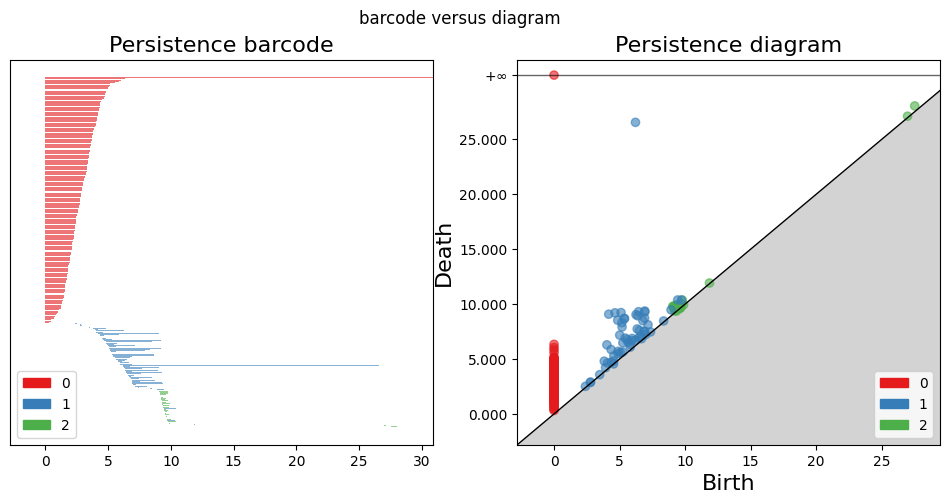

In [ ]:
#@title Barcode -> Persistence Diagram
from IPython.lib.security import random
import tadasets
import matplotlib.pyplot as plt
import gudhi

#torus = []
#for idx in range(100):
#  phi = np.random.rand() * 2 * np.pi
#  psi = np.random.rand() * 2 * np.pi
#  z = 10 * np.sin(psi)
#  r = 100 + np.cos(psi)
#  torus += [[r * np.cos(phi), r * np.sin(phi), z]]

torus = tadasets.torus(n=200, c=20, a=5, noise=None, ambient=None)

def get_persistence(point_set):
  _complex = gudhi.RipsComplex(points=point_set)
  simplex_tree = _complex.create_simplex_tree(max_dimension=3)
  simplex_tree.compute_persistence()
  return simplex_tree.persistence()

persistence = get_persistence(torus)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
gudhi.plot_persistence_barcode(persistence, axes = axes[0])
gudhi.plot_persistence_diagram(persistence, axes = axes[1])
fig.suptitle("barcode versus diagram")
plt.show()

In [ ]:
!pip install tadasets gudhi #ripser
from google.colab import output
output.clear()

In [ ]:
#@title Explore persistence diagrams
#import ripser
import gudhi

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import matplotlib as mpl


def unwind_manifold(datapoints):
  dgms = ripser.ripser(datapoints[~np.isnan(datapoints[:,0])])['dgms']
  persistence = [(0, I) for I in dgms[0]] + [(1, I) for I in dgms[1]]
  return persistence
def unwind_manifold(datapoints):
  #dgms = ripser.ripser(datapoints[~np.isnan(datapoints[:,0])])['dgms']
  #persistence = [(0, I) for I in dgms[0]] + [(1, I) for I in dgms[1]]
  _complex = gudhi.AlphaComplex(points=datapoints)
  simplex_tree = _complex.create_simplex_tree()
  simplex_tree.compute_persistence()
  persistence =  simplex_tree.persistence()
  return persistence

def roll(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi - 0.2)
  b_y = b_x - 0.2
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  roulette = np.array([[(2 + p[0]) * np.cos(2 * p[0]), (2 + p[0]) * np.sin(2 * p[0]), 2.0 * p[1]] for p in params])
  return roulette

def s_curve(X):
  t = (X[:, 0] - np.min(X[:, 0])) / (np.max(X[:, 0]) - np.min(X[:, 0]))
  t = (t * 2.0 - 1.0) * np.pi * 1.5
  x = np.sin(t)
  y = X[:, 1] / np.max(X[:, 0]) * 2 * np.pi
  z = np.sign(t) * (np.cos(t) - 1)
  return np.vstack((x, y, z)).T

def plane(X):
  p = np.array([[x[0], x[1], x[0] + x[1]] for x in X])
  return p

def torus(X):
  k_x = (X[:,0] - np.min(X[:, 0])) / (np.max(X[:,0]) - np.min(X[:,0])) * (2 * np.pi)
  k_y = (X[:,1] - np.min(X[:, 1])) / (np.max(X[:,1]) - np.min(X[:,1])) * (2 * np.pi)
  c = 1.0
  a = 0.5
  torus = np.array([(c + a * np.cos(k_y)) * np.cos(k_x),
                    (c + a * np.cos(k_y)) * np.sin(k_x),
                    a * np.sin(k_y)]).T
  #torus[torus[:,1] > 0.75, 1] = 0.75
  return torus

def mobius(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi)
  b_y = 0.5 * (np.max(X[:,1]) + np.min(X[:,1]))
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  mobius = np.array([[(1.0 + p[1]/2.0 * np.cos(p[0]/2)) * np.cos(p[0]), (1.0 + p[1]/2.0 * np.cos(p[0]/2)) * np.sin(p[0]), p[1]/2.0 * np.sin(p[0]/2)] for p in params])
  return mobius

def cylinder(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi)
  b_y = 0.5 * (np.max(X[:,1]) + np.min(X[:,1]))
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  cylinder = np.array([[2.0 * np.cos(p[0]), 2.0 * np.sin(p[0]), p[1]] for p in params])
  return cylinder

def helicoid(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi)
  b_y = 0.5 * (np.max(X[:,1]) + np.min(X[:,1]))
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  helicoid = np.array([[p[1] * np.cos(p[0]), p[1] * np.sin(p[0]), 2.0 * p[0]] for p in params])
  return helicoid

def cone(X):
  b_x = np.min(X[:,0])
  k_x = (np.max(X[:,0]) - np.min(X[:,0])) / (2 * np.pi)
  b_y = b_x - 0.2
  k_y = 0.5 * (np.max(X[:,1]) - np.min(X[:,1]))
  params = [[(x[0] - b_x)/k_x, (x[1] - b_y)/k_y] for x in X]
  cone = np.array([[p[1] * np.cos(p[0]), p[1] * np.sin(p[0]), 2.0 * p[1]] for p in params])
  return cone

def sphere(X):
  k_x = 2*np.pi / (np.max(X[:,0]) - np.min(X[:,0]))
  k_y = 2*np.pi / (np.max(X[:,0]) - np.min(X[:,0]))
  X[:,0] = k_x * (X[:,0] - np.min(X[:,0]))
  X[:,1] = k_y * (X[:,1] - np.min(X[:,1]))
  sphere = np.array([np.cos(X[:,0]) * np.sin(X[:,1]),
                     np.sin(X[:,0]) * np.sin(X[:,1]),
                     np.cos(X[:,1])])
  return sphere.T

def transform_to_3d(x, manifold):
  funcs = {'s_curve': s_curve, 'mobius': mobius, 'cylinder': cylinder,
           'helicoid': helicoid, 'cone': cone, 'plane': plane,
           'roll': roll, 'torus': torus, 'sphere': sphere}
  return funcs[manifold](x)

def plot_unwinded(x):
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  #ax.tick_params(axis="y",direction="in", pad=-40)
  #ax.tick_params(axis="x",direction="in", pad=-15)
  #ax.scatter(x[:, 0], x[:, 1], c=cols)
  gudhi.plot_persistence_diagram(x, axes=ax)
  plt.close(fig)
  return fig


import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

import json
from IPython.display import display, clear_output
from scipy.spatial import Delaunay


def get_datapoints(manifold):
  N_pts = 500
  funcs = {'s_curve': s_curve, 'mobius': mobius, 'cylinder': cylinder,
           'helicoid': helicoid, 'cone': cone, 'plane': plane,
           'roll': roll}
  if manifold in funcs.keys():
    X = np.random.random_sample((N_pts, 2))
    return funcs[manifold](X)
  if manifold == 'torus':
    # approximatly correct
    X = np.random.random_sample((N_pts, 2))
    return torus(X)
  if manifold == 'sphere':
    X = np.random.random_sample((N_pts, 2))
    X[:,0] *= 2 * np.pi
    X[:,1] = np.arcsin(np.sqrt(X[:,1])) * 2
    return sphere(X)



def get_mesh(manifold):
  pass



def invoke(manifold):
  pts = get_datapoints(manifold) #transform_to_3d(X, manifold)
  unw = unwind_manifold(pts)
  figr = plot_unwinded(unw)
  image_base64 = figure_to_base64(figr)


  x_ = np.linspace(np.min(pts[:, 0]), np.max(pts[:, 0]), num=100)
  y_ = np.linspace(np.min(pts[:, 1]), np.max(pts[:, 1]), num=100)
  xx, yy = np.meshgrid(x_, y_)
  x_vec = np.transpose(np.vstack([xx.ravel(), yy.ravel()]))
  Y = transform_to_3d(x_vec, manifold) #[:,2].reshape((x_.shape[0],y_.shape[0]))

  tri = Delaunay(x_vec, )
  simplices = tri.simplices
  I, J, K = ([triplet[c] for triplet in tri.simplices] for c in range(3))
  #print(Y[:,0].shape, Y[:,1].shape, Y[:,2].shape)
  colors = ['red'] * pts.shape[0]
  return IPython.display.JSON({'image': image_base64,
                               'g_x': Y[:,0].tolist(), 'g_y': Y[:,1].tolist(), 'g_z': Y[:,2].tolist(),
                               's_x': pts[:, 0].tolist(), 's_y': pts[:, 1].tolist(), 's_z': pts[:, 2].tolist(), 's_c': colors,
                               'simplices': [I, J, K]})


import IPython
from google.colab import output

main_str = '''
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
  <script type="application/javascript">

    var params = null;
    var debug_txt = "";
    var bg_image = new Image();


    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');

        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field

        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);
      }
    }

    var timer

   function plot_3d(g_x, g_y, g_z, simp)
   {
     cell_for_plot = document.getElementById('for_plotly_plot');
     //Plotly.deleteTraces(cell_for_plot, [0, 1]);
     var data = [{
           x: g_x,
           y: g_y,
           z: g_z,
           i: simp[0],
           j: simp[1],
           k: simp[2],
           type: 'mesh3d',
           opacity: 0.4,
           showscale: false,
           colorscale: "Viridis"
        }];
     var layout = {
          title: 'Manifold',
          autosize: false,
          width: 600,
          height: 600,
          showlegend: false,
          scene: {
            camera: {
              up: {x: 0, y: 1, z: 0},
              center: {x: 0, y: 0, z: 0},
              eye: {x: 0.0, y: -1.0, z: 1.4}
            }
          }
        };
     //debug_txt = 'before plot';
     Plotly.newPlot(cell_for_plot, data, layout);
     //debug_txt = 'go';
   }

   function plot_scatter(s_x, s_y, s_z, colors)
   {
     cell_for_plot = document.getElementById('for_plotly_plot');
     var data = [{
           x: s_x,
           y: s_y,
           z: s_z,
           type: 'scatter3d',
           mode: 'markers',
           marker: {
             size: 4,
             color: colors,
             line: {
               width: 2,
               color: 'rgba(0, 0, 0, 0.5)'
             }
           }
        }];
     var layout = {
          title: 'Manifold',
          autosize: false,
          width: 600,
          height: 600,
          showlegend: false,
          margins: {l: 0, r: 0, b: 0, t: 0},
          scene: {
            camera: {
              up: {x: 0, y: 1, z: 0},
              center: {x: 0, y: 0, z: 0},
              eye: {x: 0.0, y: -1.0, z: 1.4}
            }
          }
        };
    //Plotly.newPlot(cell_for_plot, data, layout);
    Plotly.plot(cell_for_plot, data, {});
   }


    var cur_depth = 100;

    async function calculate() {
      var e = document.getElementById("select_kernel");
      var mfld_name = e.options[e.selectedIndex].value;
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [mfld_name], {});
      params = result.data['application/json'];

      bg_image.src = 'data:image/  png;base64,' + params.image;
      //cell_for_plot = document.getElementById('for_plotly_plot');

      plot_3d(params.g_x, params.g_y, params.g_z, params.simplices);
      plot_scatter(params.s_x, params.s_y, params.s_z, params.s_c);

    }

 </script>

<div id="everything" style="height:600px;">
<div id="for_plotly_plot" style="position:absolute; top:0px; left:0px; height:600px; width:600px;">
</div>
<div id="custom_controls" style="position:absolute; top:0px; left:600px;">
  <canvas id="canvas" width="600" height="600"></canvas>
  <div style="position:absolute; top:0px; left:-600px;">
   Manifold:
   <select id="select_kernel">
       <option value="plane">Plane in 3D</option>
       <option value="mobius">Mobius strip</option>
       <option value="s_curve">S-shaped sheet</option>
       <option value="cylinder">Cylinder</option>
       <option value="helicoid">Helicoid</option>
       <option value="cone">Cone</option>
       <option value="roll">Swiss Roll</option>
       <option value="torus">Torus</option>
       <option value="sphere">Sphere</option>
   </select>
    <button type="button" onclick="calculate();">
      Diagram
    </button>
  </div>
</div>
<div>

<script>
function init()
{
  timer = setInterval(draw, 10);
}

init();
</script>
'''

display(IPython.display.HTML(main_str))
output.register_callback('notebook.InvSVM', invoke)

/usr/local/lib/python3.11/dist-packages/gudhi/persistence_graphical_tools.py:129: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")
